In [40]:
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [2]:
base = "D:\manualCDmanagement\codes\Projects\VMs\skl algorithms\Logistic Regression/00_datasets/bmi.1"
save_path = "D:\manualCDmanagement\codes\Projects\VMs\skl algorithms\Logistic Regression/bmi.1/Storage/Figures"
file_name = "bmi.csv"
path = os.path.join(base, file_name)

df = pd.read_csv(path)

df.Gender = df.Gender.map({'Male': 1, 'Female': 0})

# df.isnull().sum()
# df.columns
# df.Gender.unique()
# print(df['Index'].value_counts())


In [3]:
# corr_matrix = df.corr()
# sns.heatmap(corr_matrix, annot=True, fmt='.2f', annot_kws={"size": 8.5}, cmap='inferno')
# plt.title("correlation matrix")
# save_name = 'correlation_matrix.png'
# plt.savefig(os.path.join(save_path, save_name))

In [32]:
X = df.drop('Index', axis=1)
y = df['Index']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [34]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}


rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train_resampled, y_train_resampled)

# print("\nClass Distribution After SMOTE:")
# y_train_resampled.value_counts()

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1_weighted')

In [21]:
model = LogisticRegression(max_iter=1000, multi_class='ovr', class_weight='balanced') #ovr for One-vs-Rest or 'multinomial' for softmax (classification)
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(class_weight='balanced', max_iter=1000, multi_class='ovr')

In [59]:
y_pred = model.predict(X_test)

accu = accuracy_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)

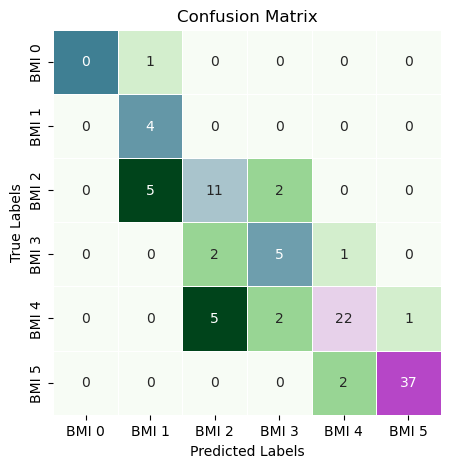

In [60]:
# print("\nAccuracy:", accu)
# print("\nConfusion Matrix:")
# print(conf)
# print("\nClassification Report:")
# print(report)
class_names = ['BMI 0', 'BMI 1', 'BMI 2', 'BMI 3', 'BMI 4', 'BMI 5']


#mask for the diagonal elements
mask = np.zeros_like(conf, dtype=bool)
np.fill_diagonal(mask, True)

#colormap for the heatmap
cmap = sns.diverging_palette(220, 300, as_cmap=True)

plt.figure(figsize=(5,5))
sns.heatmap(conf, annot=True, fmt='d', cmap=cmap, xticklabels=class_names, yticklabels=class_names, mask=~mask, cbar=False, linewidths=.5)
sns.heatmap(conf, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names, mask=mask, cbar=False, linewidths=.5)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
save_name = 'confusion_matrix.png'
# plt.savefig(os.path.join(save_path, save_name))
# plt.show()

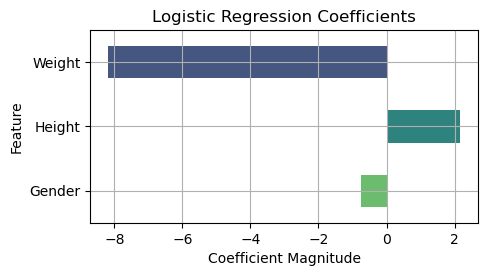

In [70]:
coefficients = model.coef_[0]

feature_names = X.columns
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

plt.figure(figsize=(5, 2.5)) 
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis', width=0.5) 
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.grid(True)
save_name = 'coefficients.png'
plt.savefig(os.path.join(save_path, save_name))